In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('C:\\Users\\user\\Desktop\\GBIG_PROJECT\\분석\\clustering_input3.csv', encoding='euc-kr')
# oran = df
df = df.iloc[:, 4:12]
df

x = df.values
MinMaxScaler().fit(x)
df2 = MinMaxScaler().fit_transform(x)
df2 = pd.DataFrame(df2, columns=['culture', 'build1', 'build2',	'build3', 'build4',	'build5','build6', 'build7'])
# df2 = pd.DataFrame(df2, columns=['culture', 'build1', 'build2',	'build3', 'build4',	'build5','build6', 'build7', 'build8','destination','population','consumer'])
df2

# # kmeans = KMeans(n_clusters=3,random_state=0, max_iter=10).fit(df2)
# kmeans = KMeans(n_clusters=3,random_state=0, in).fit(df2)

# df2['cluster'] = kmeans.labels_
# final_centroid = kmeans.cluster_centers_

# print(df2['cluster'].unique())
# df2

,culture,build1,build2,build3,build4,build5,build6,build7
0,0.029197,0.505556,0.171429,0.000000,0.160920,0.157480,0.329399,0.057762
1,0.007299,0.411111,0.057143,0.148148,0.022989,0.102362,0.295422,0.043321
2,0.029197,0.500000,0.085714,0.148148,0.103448,0.118110,0.447783,0.032491
3,0.021898,0.316667,0.095238,0.037037,0.126437,0.086614,0.340486,0.010830
4,0.000000,0.405556,0.057143,0.074074,0.011494,0.031496,0.244993,0.043321
...,...,...,...,...,...,...,...,...
513,0.000000,0.244444,0.009524,0.000000,0.022989,0.007874,0.017883,0.003610
514,0.007299,0.216667,0.057143,0.037037,0.022989,0.023622,0.045422,0.021661
515,0.029197,0.200000,0.095238,0.037037,0.022989,0.039370,0.061874,0.007220
516,0.058394,0.700000,0.219048,0.259259,0.103448,0.149606,0.369099,0.104693


In [6]:
# kmeans = KMeans(n_clusters=3,random_state=0, max_iter=10).fit(df2)
kmeans = KMeans(n_clusters=3,random_state=300, init='k-means++').fit(df2)

df2['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_
df2

,culture,build1,build2,build3,build4,build5,build6,build7,cluster
0,0.029197,0.505556,0.171429,0.000000,0.160920,0.157480,0.329399,0.057762,0
1,0.007299,0.411111,0.057143,0.148148,0.022989,0.102362,0.295422,0.043321,1
2,0.029197,0.500000,0.085714,0.148148,0.103448,0.118110,0.447783,0.032491,0
3,0.021898,0.316667,0.095238,0.037037,0.126437,0.086614,0.340486,0.010830,1
4,0.000000,0.405556,0.057143,0.074074,0.011494,0.031496,0.244993,0.043321,1
...,...,...,...,...,...,...,...,...,...
513,0.000000,0.244444,0.009524,0.000000,0.022989,0.007874,0.017883,0.003610,1
514,0.007299,0.216667,0.057143,0.037037,0.022989,0.023622,0.045422,0.021661,1
515,0.029197,0.200000,0.095238,0.037037,0.022989,0.039370,0.061874,0.007220,1
516,0.058394,0.700000,0.219048,0.259259,0.103448,0.149606,0.369099,0.104693,0


[0 1 2]


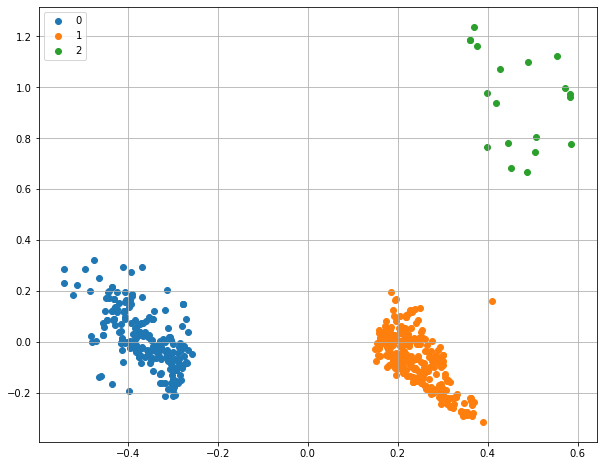

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Standardize the data to have a mean of ~0 and a variance of 1
x = MinMaxScaler().fit_transform(df2)

pca = PCA(random_state=1107)
X_p = pca.fit_transform(df2)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1','PC2'])
# 주성분으로 이루어진 데이터 프레임 구성

sum(pca.explained_variance_ratio_)
principalDf

# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(df)

principalDf['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

print(principalDf['cluster'].unique())

is_cluster = principalDf['cluster'] == 0
is_c0 = principalDf[is_cluster]
is_c0

is_cluster = principalDf['cluster'] == 1
is_c1 = principalDf[is_cluster]
is_c1

is_cluster = principalDf['cluster'] == 2
is_c2 = principalDf[is_cluster]
is_c2

plt.figure(figsize=(10, 8))
plt.scatter(is_c0['PC1'], is_c0['PC2'], label='0')
plt.scatter(is_c1['PC1'], is_c1['PC2'], label='1')
plt.scatter(is_c2['PC1'], is_c2['PC2'], label='2')
plt.legend()
plt.grid()
plt.show()

In [8]:
rank = df2

sc = df.iloc[:, -3:]
sc

x = sc.values
MinMaxScaler().fit(x)
sc = MinMaxScaler().fit_transform(x)
# df2 = pd.DataFrame(df2, columns=['culture', 'build1', 'build2',   'build3', 'build4',   'build5','build6', 'build7', 'build8'])
sc = pd.DataFrame(sc, columns=['destination','population','consumer'])
sc

rank['destination'] = sc['destination']
rank['population'] = sc['population']
rank['consumer'] = sc['consumer']
# group = df2.groupby(df2['cluster'])
# group.mean()
rank

,culture,build1,build2,build3,build4,build5,build6,build7,cluster,destination,population,consumer
0,0.029197,0.505556,0.171429,0.000000,0.160920,0.157480,0.329399,0.057762,0,0.157480,0.329399,0.057762
1,0.007299,0.411111,0.057143,0.148148,0.022989,0.102362,0.295422,0.043321,1,0.102362,0.295422,0.043321
2,0.029197,0.500000,0.085714,0.148148,0.103448,0.118110,0.447783,0.032491,0,0.118110,0.447783,0.032491
3,0.021898,0.316667,0.095238,0.037037,0.126437,0.086614,0.340486,0.010830,1,0.086614,0.340486,0.010830
4,0.000000,0.405556,0.057143,0.074074,0.011494,0.031496,0.244993,0.043321,1,0.031496,0.244993,0.043321
...,...,...,...,...,...,...,...,...,...,...,...,...
513,0.000000,0.244444,0.009524,0.000000,0.022989,0.007874,0.017883,0.003610,1,0.007874,0.017883,0.003610
514,0.007299,0.216667,0.057143,0.037037,0.022989,0.023622,0.045422,0.021661,1,0.023622,0.045422,0.021661
515,0.029197,0.200000,0.095238,0.037037,0.022989,0.039370,0.061874,0.007220,1,0.039370,0.061874,0.007220
516,0.058394,0.700000,0.219048,0.259259,0.103448,0.149606,0.369099,0.104693,0,0.149606,0.369099,0.104693


In [10]:
rank = rank.iloc[:, :-3]

rank.to_csv('C:\\Users\\user\\Desktop\\GBIG_PROJECT\\분석\\군집화_서열.csv', encoding='euc-kr')

In [9]:
group = rank.groupby(rank['cluster'])
group.mean().rank(method='max', ascending=False)

,culture,build1,build2,build3,build4,build5,build6,build7,destination,population,consumer
cluster,,,,,,,,,,,
0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
df3 = df2
df3['cluster'] = df2['cluster'].replace(1, 0)

df4 = df3
df4['cluster'] = df3['cluster'].replace(2, 1)
df4 = df4.iloc[:, :-3]
df4

,culture,build1,build2,build3,build4,build5,build6,build7,cluster
0,0.029197,0.505556,0.171429,0.000000,0.160920,0.157480,0.329399,0.057762,0
1,0.007299,0.411111,0.057143,0.148148,0.022989,0.102362,0.295422,0.043321,0
2,0.029197,0.500000,0.085714,0.148148,0.103448,0.118110,0.447783,0.032491,0
3,0.021898,0.316667,0.095238,0.037037,0.126437,0.086614,0.340486,0.010830,0
4,0.000000,0.405556,0.057143,0.074074,0.011494,0.031496,0.244993,0.043321,0
...,...,...,...,...,...,...,...,...,...
513,0.000000,0.244444,0.009524,0.000000,0.022989,0.007874,0.017883,0.003610,0
514,0.007299,0.216667,0.057143,0.037037,0.022989,0.023622,0.045422,0.021661,0
515,0.029197,0.200000,0.095238,0.037037,0.022989,0.039370,0.061874,0.007220,0
516,0.058394,0.700000,0.219048,0.259259,0.103448,0.149606,0.369099,0.104693,0


In [12]:
i4 = rank['cluster'] == 0
i4 = rank[i4]
len(i4)

215

In [13]:
i4 = rank['cluster'] == 1
i4 = rank[i4]
len(i4)

284

In [14]:
i4 = rank['cluster'] == 2
i4 = rank[i4]
len(i4)

19

In [112]:
df4.to_csv('C:\\Users\\user\\Desktop\\GBIG_PROJECT\\분석\\군집화_결과.csv', encoding='euc-kr')